In [1]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64


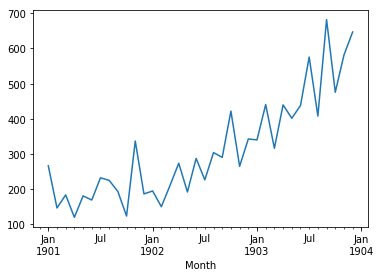

In [3]:
# dataset downloaded from link
#  https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period#!ds=22r0&display=line
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

test_data RMSE: 84.832


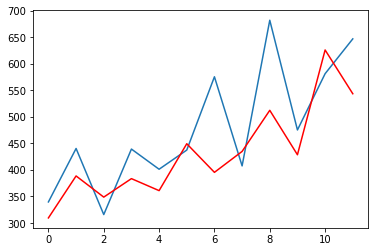

In [4]:
X = series.values
train_data, test_data = X[0:-12], X[-12:]
history = [x for x in train_data]
predictions = list()

for t in range(len(test_data)):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    
    frst = model_fit.forecast()[0]
    
    predictions.append(frst)
    history.append(test_data[t])

rmse = sqrt(mean_squared_error(test_data, predictions))
print('test_data RMSE: %.3f' % rmse)

pyplot.plot(test_data)
pyplot.plot(predictions, color='red')
pyplot.show()